# Lead Scoring Case Study #
 
*Problem Statement:*
 
 Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Reading and Understanding data

In [19]:
# libraries import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [21]:
df_LeadData = pd.read_csv('Leads.csv')

df_LeadData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [22]:
df_LeadData.shape

(9240, 37)

In [23]:
df_LeadData.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [24]:
df_LeadData.duplicated().sum()

0

No duplicate rows found

In [25]:
df_LeadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

1. Many columns have null values, Such columns must be dropped
2. From Prospect ID and Lead Number , one column can be dropped, as both are unique identifiers
3. Some Column names are longer than required, these columns must be renamed
4. Some columns have 'select' as entry, These should be changed to null. 

## Data Cleaning

### Rename Column Name

In [26]:
df_LeadData.columns = df_LeadData.columns.str.replace(' ', '_').str.lower()

df_LeadData.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [27]:
#shorten Column Names
df_LeadData.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)
df_LeadData.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


### Drop 'Prospect_Id' Column

In [28]:
df_LeadData.drop('prospect_id', axis = 1, inplace = True)

### Replace 'Select' with null

In [29]:
# Check which columns have 'select' value
df_obj = df_LeadData.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


4 Columns have 'select' value

In [30]:
#replace select value with null
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace values
df_LeadData[sel_cols] = df_LeadData[sel_cols].replace('Select', np.NaN)

### Handle null values

In [31]:
#null value count
df_LeadData.isnull().sum()

lead_number                        0
lead_origin                        0
lead_source                       36
do_not_email                       0
do_not_call                        0
converted                          0
total_visits                     137
time_on_website                    0
page_views_per_visit             137
last_activity                    103
country                         2461
specialization                  3380
source                          7250
occupation                      2690
course_selection_reason         2709
search                             0
magazine                           0
newspaper_article                  0
x_education_forums                 0
newspaper                          0
digital_advertisement              0
through_recommendations            0
courses_updates                    0
tags                            3353
lead_quality                    4767
supply_chain_content_updates       0
dm_content_updates                 0
l

In [32]:
#null value percentage
(df_LeadData.isnull().sum() / df_LeadData.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

In [33]:
# drop columns having null values more than 40%
df_LeadData.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

df_LeadData.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No


In [34]:
(df_LeadData.isnull().sum() / df_LeadData.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

There are 5 columns still have large number of null values
i. Country
ii. specialization
iii. occupation
iv. course_selection_reason
v. city

i. Country Column

In [35]:
df_LeadData.country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

In [36]:
# more than 97% values are either India or NaN. This column should be dropped
df_LeadData.drop('country', axis = 1, inplace = True)

ii. specialization   

In [37]:
df_LeadData.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

In [38]:
# categorize all management courses
df_LeadData.loc[(df_LeadData.specialization == 'Finance Management') | (df_LeadData.specialization == 'Human Resource Management') | 
       (df_LeadData.specialization == 'Marketing Management') |  (df_LeadData.specialization == 'Operations Management') |
       (df_LeadData.specialization == 'IT Projects Management') | (df_LeadData.specialization == 'Supply Chain Management') |
       (df_LeadData.specialization == 'Healthcare Management') | (df_LeadData.specialization == 'Hospitality Management') |
       (df_LeadData.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all busines courses
df_LeadData.loc[(df_LeadData.specialization == 'Business Administration') | (df_LeadData.specialization == 'International Business') | 
       (df_LeadData.specialization == 'Rural and Agribusiness') | (df_LeadData.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# categorize all industry courses
df_LeadData.loc[(df_LeadData.specialization == 'Banking, Investment And Insurance') | (df_LeadData.specialization == 'Media and Advertising') |
       (df_LeadData.specialization == 'Travel and Tourism') | (df_LeadData.specialization == 'Services Excellence') |
       (df_LeadData.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [39]:
df_LeadData.specialization.value_counts(normalize = True, dropna = False) * 100

Management Specializations   46.03
NaN                          36.58
Industry Specializations      9.70
Business Specializations      7.69
Name: specialization, dtype: float64

In [41]:
df_LeadData.specialization.value_counts(normalize = True, dropna = False) 

Management Specializations   0.46
NaN                          0.37
Industry Specializations     0.10
Business Specializations     0.08
Name: specialization, dtype: float64

iii. occupation

In [42]:
df_LeadData.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

In [43]:
# combine low representing categories
df_LeadData.loc[(df_LeadData.occupation == 'Student') | (df_LeadData.occupation == 'Other') | (df_LeadData.occupation == 'Housewife') | 
       (df_LeadData.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [44]:
df_LeadData.occupation.value_counts(normalize = True, dropna = False) 

Unemployed             0.61
NaN                    0.29
Working Professional   0.08
Student and Others     0.03
Name: occupation, dtype: float64

iv. course_selection_reason

In [46]:
df_LeadData.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

This column should be dropped as Better Career Prospects and null values contribution is more than 99%

In [47]:
df_LeadData.drop('course_selection_reason', axis = 1, inplace = True)

v. city

In [48]:
df_LeadData.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

In [49]:
# categorize all non-mumbai, but Maharashtra cities
df_LeadData.loc[(df_LeadData.city == 'Thane & Outskirts') | (df_LeadData.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
df_LeadData.loc[(df_LeadData.city == 'Other Cities') | (df_LeadData.city == 'Other Metro Cities') | (df_LeadData.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'

In [50]:
df_LeadData.city.value_counts(normalize = True, dropna = False) * 100

NaN                             39.71
Mumbai                          34.87
Non-Mumbai Maharashtra Cities   13.08
Non-Maharashtra Cities          12.34
Name: city, dtype: float64

### Handle missing values in categorical column

In [52]:
(df_LeadData.isnull().sum() / df_LeadData.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
specialization                 36.58
occupation                     29.11
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

In [53]:
# determine unique values for all object datatype columns
for k, v in df_LeadData.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


lead_origin and lead_source have more number of unique values

i. lead_origin column

In [54]:
df_LeadData.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

In [55]:
# smaller values must be grouped together
df_LeadData.loc[(df_LeadData.lead_origin == 'Lead Import') | (df_LeadData.lead_origin == 'Quick Add Form') | (df_LeadData.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

ii. lead_source column

In [56]:
df_LeadData.lead_source.value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [57]:
# Impute NA values with mode i.e 'Google'
df_LeadData.lead_source.fillna(df_LeadData.lead_source.mode()[0], inplace=True)

In [58]:
#also group values
df_LeadData['lead_source'] = df_LeadData['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

### Clean Binary Columns

In [59]:
# Check columns havng only one unique value
for k, v in df_LeadData.select_dtypes(include='object').nunique().to_dict().items():
    if v==1:
        print('{} = {}'.format(k,v))

magazine = 1
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
cheque_payment = 1


Above columns must be dropped

In [60]:
drop_bin = ['magazine', 'courses_updates', 'supply_chain_content_updates', 'dm_content_updates', 
           'cheque_payment']

df_LeadData.drop(drop_bin, axis = 1, inplace = True)

In [61]:
# Check data imbalance for other binary columns
df_bin = df_LeadData[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64

No    99.98
Yes    0.02
Name: do_not_call, dtype: float64

No    99.85
Yes    0.15
Name: search, dtype: float64

No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64

No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64

No    99.99
Yes    0.01
Name: newspaper, dtype: float64

No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64

No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64

No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64



following columns have heavy imbalance of data and must be dropped
1. do_not_call
2. search
3. newspaper_article
4. x_education_forums
5. newspaper
6. digital_advertisement
7. through_recommendations

In [62]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations']

df_LeadData.drop(drop_bin, axis = 1, inplace = True)

### Clean Numerical Columns

In [63]:
df_LeadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   int64  
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9103 non-null   float64
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9103 non-null   float64
 8   specialization        5860 non-null   object 
 9   occupation            6550 non-null   object 
 10  city                  5571 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 866.4+ KB


In [64]:
# lead_number column should be of object type
df_LeadData.lead_number = df_LeadData.lead_number.astype('object')

In [65]:
# total visit column - fill NA with median and change datatype to integer
df_LeadData.total_visits.fillna(df_LeadData.total_visits.median(), inplace=True)
df_LeadData.total_visits = df_LeadData.total_visits.astype('int')

In [66]:
# page_views_per_visit column - fill NA with median
df_LeadData.page_views_per_visit.fillna(df_LeadData.page_views_per_visit.median(), inplace=True)

In [67]:
df_LeadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        5860 non-null   object 
 9   occupation            6550 non-null   object 
 10  city                  5571 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB


## Exploratory Data Analysis

Numerical Columns

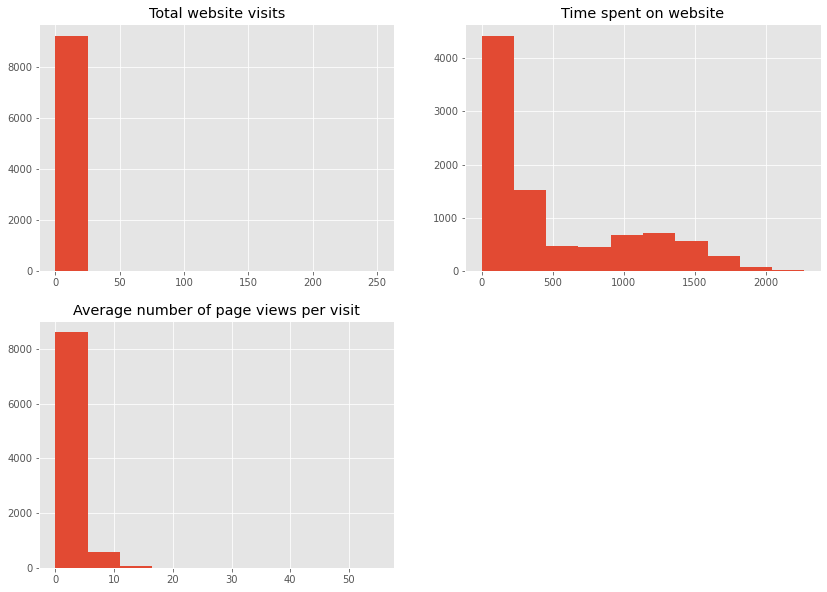

In [68]:
### Numerical Columns
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df_LeadData.total_visits, bins = 10)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df_LeadData.time_on_website, bins = 10)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df_LeadData.page_views_per_visit, bins = 10)
plt.title('Average number of page views per visit')

plt.show()

There might be outliers in these columns

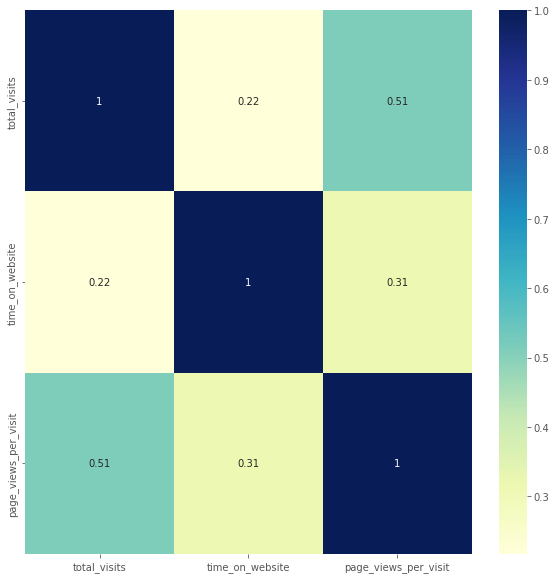

In [69]:
plt.figure(figsize = (10,10))
sns.heatmap(df_LeadData[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

No significant correlation found

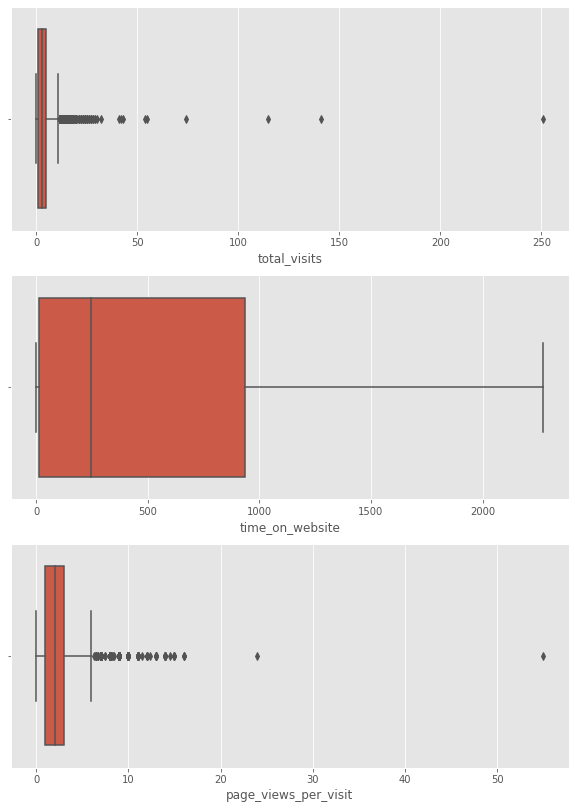

In [70]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df_LeadData.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df_LeadData.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df_LeadData.page_views_per_visit)
plt.show()

total_visits and page_views_per_visit columns have upper bound outliers
data can be capped to 99 percentile

In [71]:
# capping at 99 percentile
df_LeadData.total_visits.loc[df_LeadData.total_visits >= df_LeadData.total_visits.quantile(0.99)] = df_LeadData.total_visits.quantile(0.99)
df_LeadData.page_views_per_visit.loc[df_LeadData.page_views_per_visit >= 
                            df_LeadData.page_views_per_visit.quantile(0.99)] = df_LeadData.page_views_per_visit.quantile(0.99)

Categorical Column

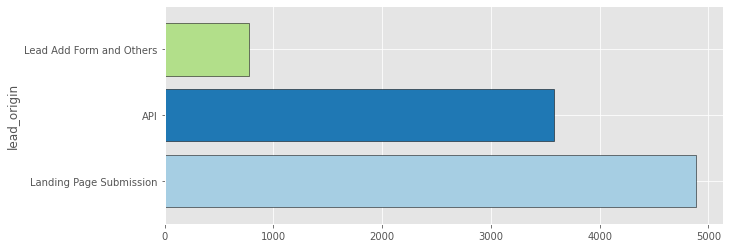

In [72]:
#lead_origin
plt.figure(figsize = (10, 4))
df_LeadData.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_LeadData))))
plt.show()

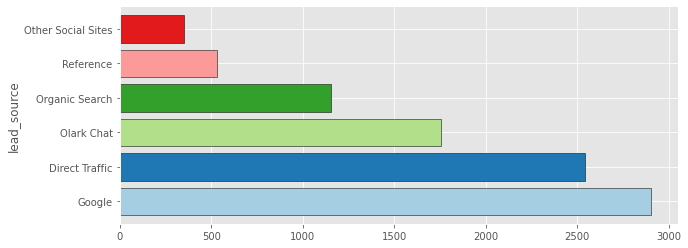

In [73]:
#lead_source
plt.figure(figsize = (10, 4))

df_LeadData.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_LeadData))))
plt.show()

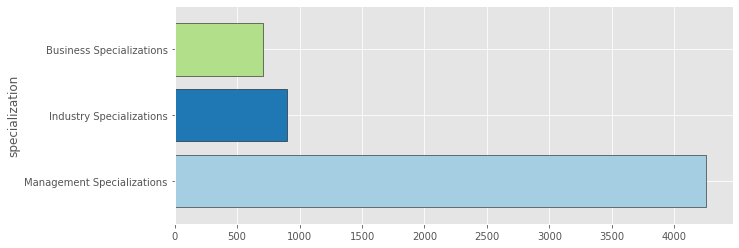

In [74]:
#specialization
plt.figure(figsize = (10, 4))

df_LeadData.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_LeadData))))
plt.show()

Most of the specialization taken are Management Specialization

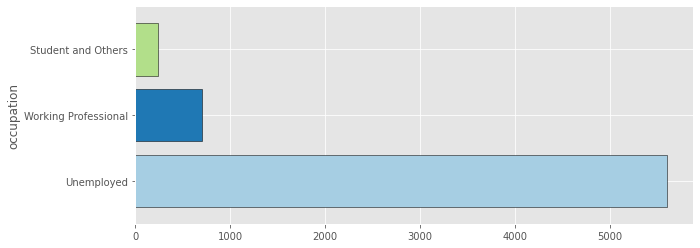

In [75]:
plt.figure(figsize = (10, 4))

df_LeadData.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_LeadData))))
plt.show()

Unemployed users are the most significant leads

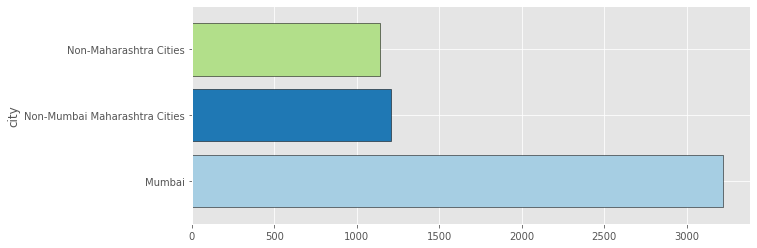

In [76]:
plt.figure(figsize = (10, 4))

df_LeadData.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_LeadData))))
plt.show()

Candidates from Mumbai and Maharashtra are prominant leads

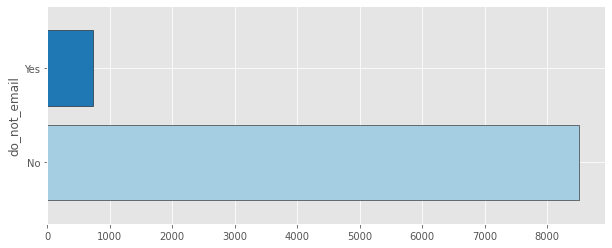

In [77]:
# do_not_email
plt.figure(figsize = (10, 4))

df_LeadData.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_LeadData))))
plt.show()

## Data Preparation

conversion of binary YES/NO to 1/0

In [78]:
for k, v in df_LeadData.select_dtypes(include='object').nunique().to_dict().items():
    if v==2:
        print('{} = {}'.format(k,v))

do_not_email = 2
mastering_interview = 2


There are two binary columns do_not_email and mastering_interview

In [79]:
binlist = ['do_not_email', 'mastering_interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
# Applying the function to the housing list
df_LeadData[binlist] = df_LeadData[binlist].apply(binary_map)
df_LeadData.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,NaN,Unemployed,NaN,0
1,660728,API,Organic Search,0,0,5,674,2.50,NaN,Unemployed,NaN,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,NaN,Unemployed,Mumbai,0


In [80]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_LeadData[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)

# Adding the results to the master dataframe
leads = pd.concat([df_LeadData, dummy1], axis=1)

In [81]:
# Dropping the columns for which dummies have been created
leads.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

leads.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,660728,0,0,5,674,2.50,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,660727,0,1,2,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.00,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428,1.00,0,1,0,1,0,0,0,0,0,0,1,0,0,0


## Creation of test and train Sets

Test-Train Split

In [82]:
categorical_cols = ['lead_origin', 'lead_source', 'specialization','occupation','city']
numerical_cols = ['total_visits','time_on_website','page_views_per_visit']

In [83]:
df_train, df_test = train_test_split(leads, train_size = 0.7, random_state = 100)

In [84]:
scaler = MinMaxScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,641410,0,0,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,597687,0,0,0.24,0.21,0.15,1,1,0,0,0,0,0,0,0,0,1,0,1,0
3516,626825,0,0,0.29,0.05,0.28,0,0,0,0,1,0,0,0,0,0,1,0,0,0
8105,587928,0,0,0.29,0.54,0.56,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,622366,0,0,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [85]:
df_train.describe()

,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
count,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00
mean,0.08,0.38,0.20,0.21,0.26,0.31,0.53,0.08,0.32,0.19,0.12,0.04,0.06,0.09,0.46,0.61,0.08,0.13,0.13
std,0.27,0.49,0.19,0.24,0.22,0.46,0.50,0.28,0.47,0.39,0.33,0.19,0.24,0.29,0.50,0.49,0.27,0.33,0.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.06,0.01,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.18,0.11,0.22,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,0.00,1.00,0.29,0.41,0.33,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [88]:
y_train = df_train.converted
X_train = df_train.drop(['converted'],axis =1)

In [89]:
X_train.shape

(6468, 19)

In [90]:
y_train.shape

(6468,)

In [93]:
y_test = df_test.converted
X_test = df_test.drop(['converted'],axis =1)

In [94]:
X_test.shape

(2772, 19)

In [95]:
y_test.shape

(2772,)

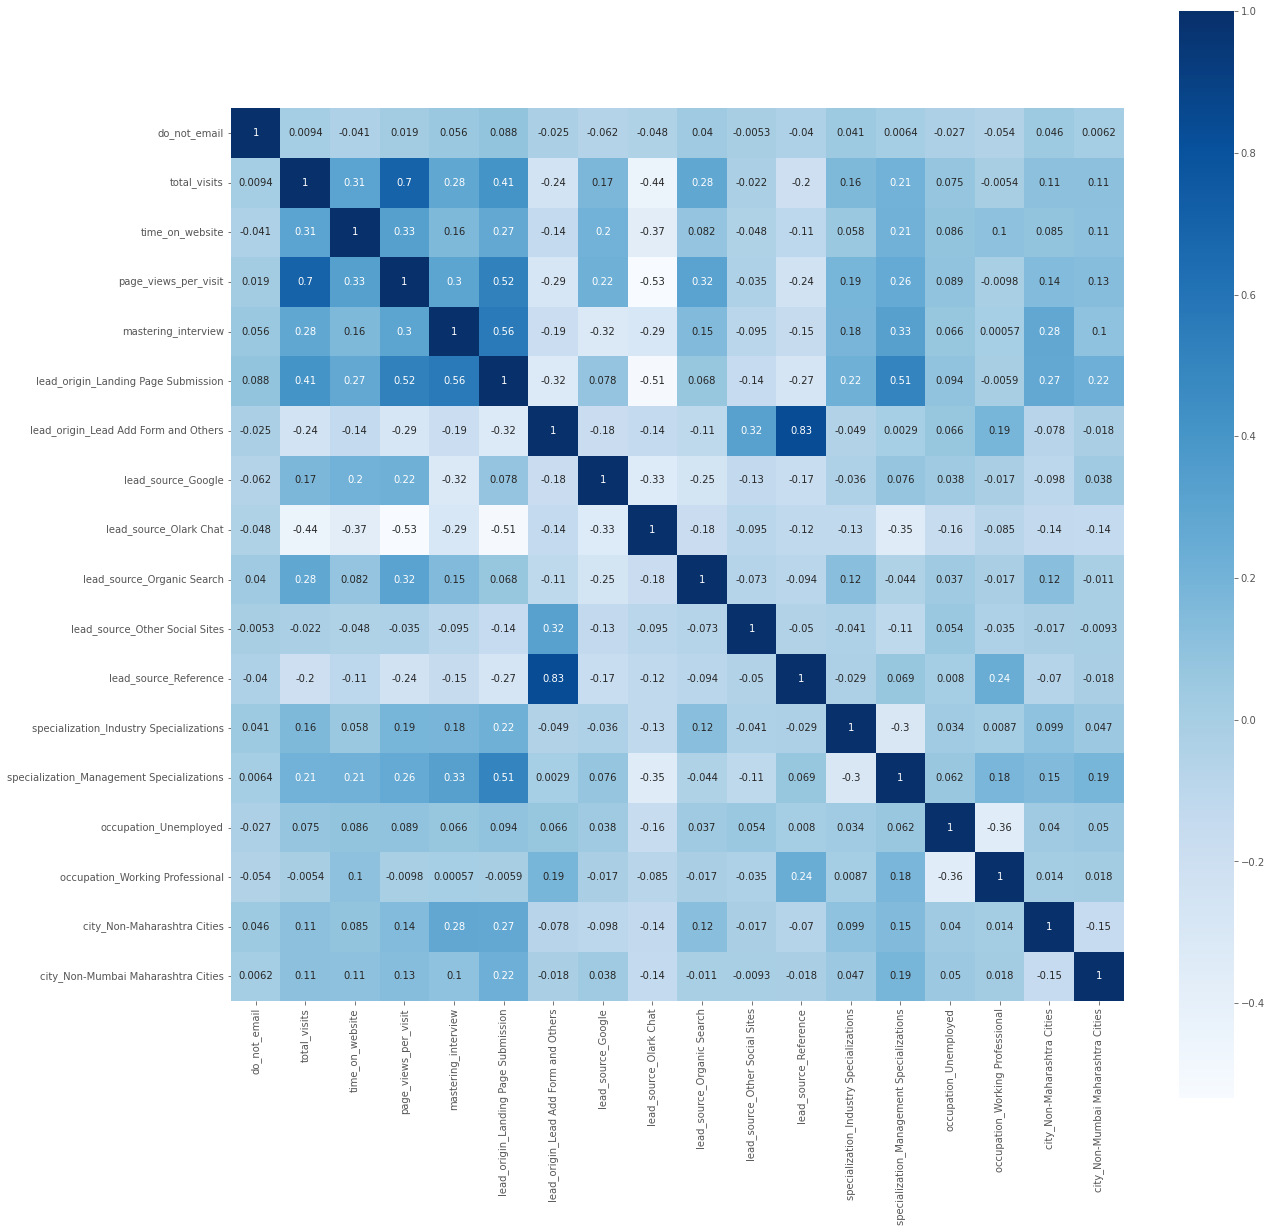

In [96]:
corr = X_train.corr()

plt.figure(figsize = [20,20])
sns.heatmap(corr, annot = True, square = True, cmap = 'Blues')
plt.show()

There is high multicollinearity. Columns causing multicollinearity must be dropped.

In [101]:
drop_cols = ['lead_origin_Landing Page Submission','total_visits',
             'mastering_interview','lead_origin_Lead Add Form and Others','lead_source_Organic Search']

In [102]:
# Dropping the columns to overcome multicollinearity

X_train.drop(drop_cols, axis = 1, inplace = True)

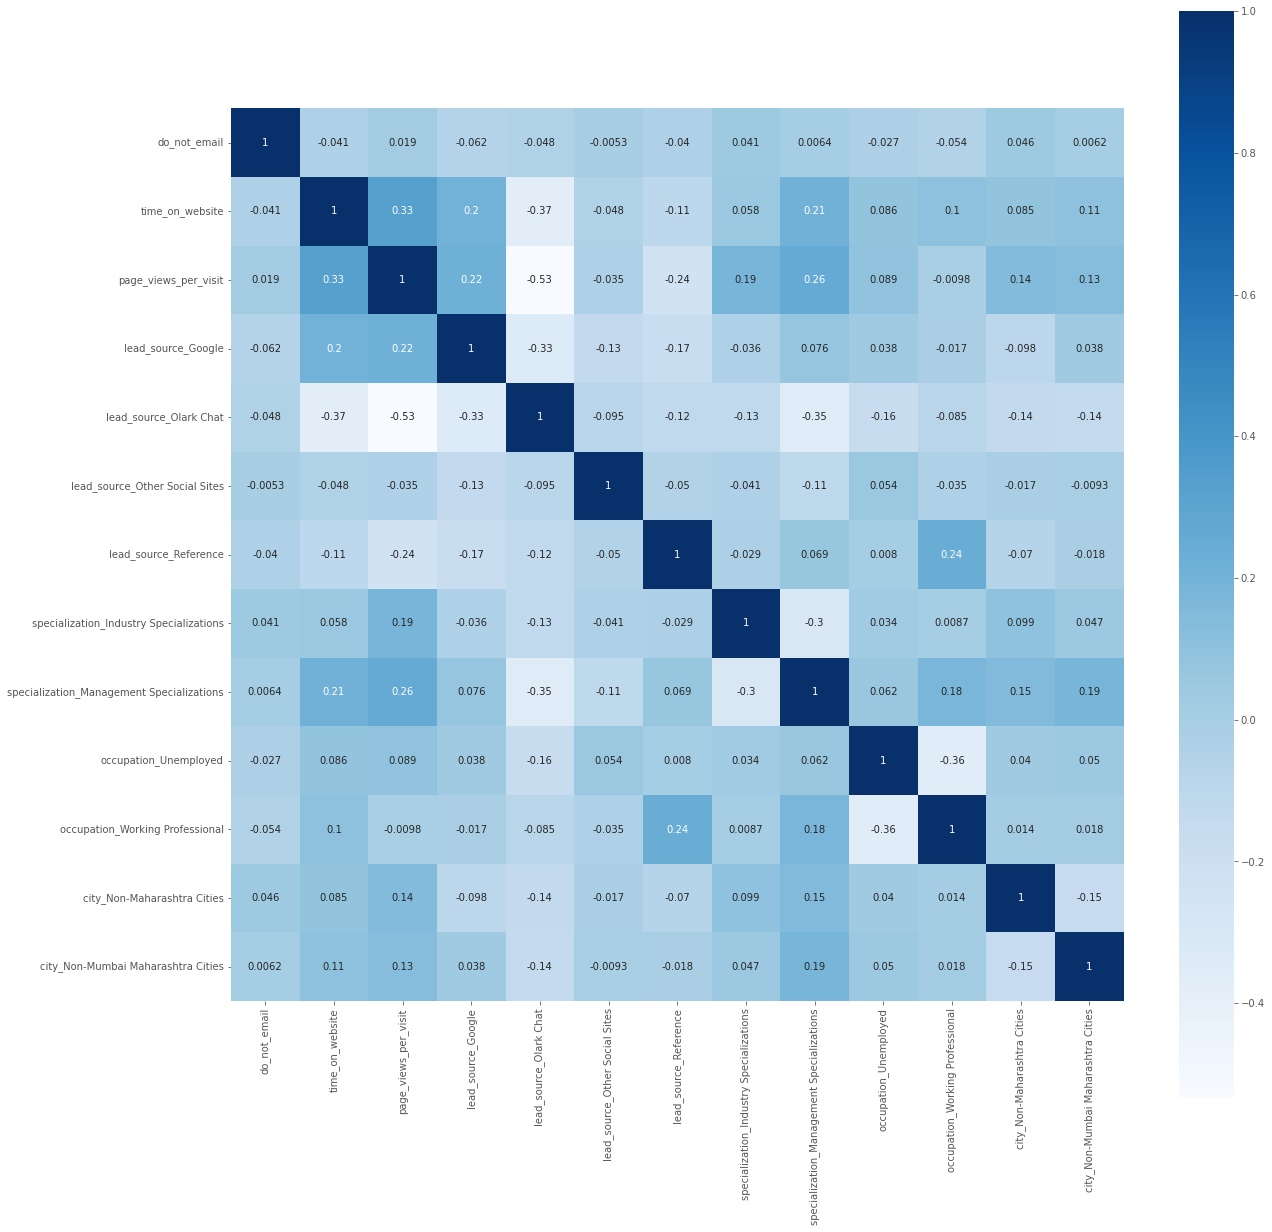

In [103]:
corr = X_train.corr()

plt.figure(figsize = [20,20])
sns.heatmap(corr, annot = True, square = True, cmap = 'Blues')
plt.show()

## Model Building

In [113]:
#X_train
logm1 = sm.GLM(y_train, (sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.9
Date:                Sat, 12 Mar 2022   Deviance:                       6031.9
Time:                        12:20:27   Pearson chi2:                 7.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -3.5748      0.878     -4.073      0.000      -5.295      -1.855
lead_number                                9.544e-07   1.42e-06      0.672      0.501   -1.83e-06    3.74e-06
do_not_email                                 -1.1416      0.151     -7.575      0.000      -1.437      -0.846
time_on_website                               4.2702      0.155     27.503      0.000       3.966       4.575
page_views_per_visit                         -0.6278      0.195     -3.221      0.001      -1.010      -0.246
lead_source_Google                            0.3762      0.078      4.800      0.000       0.223       0.530
lead_source_Olark Chat                        1.0140      0.122      8.343      0.000       0.776       1.252
lead_source_Other Social Sites                1.7105      0.166     10.303      0.000       1.385       2.036
lead_source_Reference                         3.5387      0.211     16.753      0.000       3.125       3.953
specialization_Industry Specializations       0.4627      0.123      3.747      0.000       0.221       0.705
specialization_Management Specializations     0.2593      0.080      3.244      0.001       0.103       0.416
occupation_Unemployed                         1.1944      0.077     15.543      0.000       1.044       1.345
occupation_Working Professional               3.6042      0.190     18.997      0.000       3.232       3.976
city_Non-Maharashtra Cities                   0.0791      0.101      0.780      0.435      -0.120       0.278
city_Non-Mumbai Maharashtra Cities            0.0333      0.099      0.335      0.737      -0.161       0.228
=============================================================================================================
"""

### Feature selection using RFE

In [114]:
logreg = LogisticRegression()
rfe = RFE(logreg,12)
rfe = rfe.fit(X_train,y_train)

In [115]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('lead_number', True, 1),
 ('do_not_email', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('lead_source_Google', False, 3),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Industry Specializations', False, 2),
 ('specialization_Management Specializations', True, 1),
 ('occupation_Unemployed', True, 1),
 ('occupation_Working Professional', True, 1),
 ('city_Non-Maharashtra Cities', True, 1),
 ('city_Non-Mumbai Maharashtra Cities', True, 1)]

In [117]:
col = X_train.columns[rfe.support_]

In [118]:
X_train.columns[~rfe.support_]

Index(['lead_source_Google', 'specialization_Industry Specializations'], dtype='object')

### Assessing the model 

In [122]:
X_train_sm = sm.add_constant(X_train[col].astype(float))

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3032.8
Date:                Sat, 12 Mar 2022   Deviance:                       6065.5
Time:                        17:22:30   Pearson chi2:                 7.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -3.8070      0.870     -4.376      0.000      -5.512      -2.102
lead_number                                1.772e-06    1.4e-06      1.267      0.205    -9.7e-07    4.51e-06
do_not_email                                 -1.1534      0.150     -7.693      0.000      -1.447      -0.860
time_on_website                               4.2905      0.155     27.727      0.000       3.987       4.594
page_views_per_visit                         -0.5505      0.191     -2.889      0.004      -0.924      -0.177
lead_source_Olark Chat                        0.7619      0.112      6.833      0.000       0.543       0.980
lead_source_Other Social Sites                1.4332      0.158      9.094      0.000       1.124       1.742
lead_source_Reference                         3.3389      0.207     16.162      0.000       2.934       3.744
specialization_Management Specializations     0.1161      0.071      1.626      0.104      -0.024       0.256
occupation_Unemployed                         1.2076      0.077     15.743      0.000       1.057       1.358
occupation_Working Professional               3.6437      0.189     19.242      0.000       3.273       4.015
city_Non-Maharashtra Cities                   0.0388      0.098      0.395      0.693      -0.154       0.231
city_Non-Mumbai Maharashtra Cities            0.0588      0.098      0.599      0.549      -0.134       0.251
=============================================================================================================
"""

In [123]:
# drop the column with highest p value
col = col.drop('city_Non-Mumbai Maharashtra Cities')

In [125]:
X_train_sm = sm.add_constant(X_train[col].astype(float))

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3032.9
Date:                Sat, 12 Mar 2022   Deviance:                       6065.9
Time:                        17:23:11   Pearson chi2:                 7.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -3.8094      0.870     -4.379      0.000      -5.514      -2.104
lead_number                                1.782e-06    1.4e-06      1.274      0.203    -9.6e-07    4.52e-06
do_not_email                                 -1.1530      0.150     -7.690      0.000      -1.447      -0.859
time_on_website                               4.2934      0.155     27.758      0.000       3.990       4.597
page_views_per_visit                         -0.5450      0.190     -2.864      0.004      -0.918      -0.172
lead_source_Olark Chat                        0.7593      0.111      6.816      0.000       0.541       0.978
lead_source_Other Social Sites                1.4339      0.158      9.098      0.000       1.125       1.743
lead_source_Reference                         3.3388      0.207     16.161      0.000       2.934       3.744
specialization_Management Specializations     0.1230      0.070      1.747      0.081      -0.015       0.261
occupation_Unemployed                         1.2087      0.077     15.760      0.000       1.058       1.359
occupation_Working Professional               3.6448      0.189     19.248      0.000       3.274       4.016
city_Non-Maharashtra Cities                   0.0271      0.096      0.282      0.778      -0.162       0.216
=============================================================================================================
"""

In [126]:
col = col.drop('specialization_Management Specializations')
col = col.drop('city_Non-Maharashtra Cities')

In [128]:
X_train_sm = sm.add_constant(X_train[col].astype(float))

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3034.6
Date:                Sat, 12 Mar 2022   Deviance:                       6069.1
Time:                        17:24:39   Pearson chi2:                 7.31e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.6886      0.867     -4.256      0.000      -5.387      -1.990
lead_number                      1.668e-06    1.4e-06      1.194      0.232   -1.07e-06     4.4e-06
do_not_email                       -1.1544      0.150     -7.700      0.000      -1.448      -0.861
time_on_website                     4.3108      0.154     27.905      0.000       4.008       4.614
page_views_per_visit               -0.5147      0.189     -2.720      0.007      -0.886      -0.144
lead_source_Olark Chat              0.7164      0.109      6.601      0.000       0.504       0.929
lead_source_Other Social Sites      1.3923      0.156      8.946      0.000       1.087       1.697
lead_source_Reference               3.3412      0.206     16.188      0.000       2.937       3.746
occupation_Unemployed               1.2179      0.076     15.923      0.000       1.068       1.368
occupation_Working Professional     3.6845      0.188     19.577      0.000       3.316       4.053
===================================================================================================
"""

p-values are all below 0.05

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = ['VIF'], ascending = False)
vif

,Features,VIF
0,lead_number,8.82
3,page_views_per_visit,3.99
7,occupation_Unemployed,3.06
2,time_on_website,2.23
4,lead_source_Olark Chat,2.14
8,occupation_Working Professional,1.39
6,lead_source_Reference,1.37
1,do_not_email,1.10
5,lead_source_Other Social Sites,1.09


VIF values are all below 4

In [134]:
X_train_sm = sm.add_constant(X_train[col].astype(float))
res = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3034.6
Date:                Sat, 12 Mar 2022   Deviance:                       6069.1
Time:                        17:27:19   Pearson chi2:                 7.31e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.6886      0.867     -4.256      0.000      -5.387      -1.990
lead_number                      1.668e-06    1.4e-06      1.194      0.232   -1.07e-06     4.4e-06
do_not_email                       -1.1544      0.150     -7.700      0.000      -1.448      -0.861
time_on_website                     4.3108      0.154     27.905      0.000       4.008       4.614
page_views_per_visit               -0.5147      0.189     -2.720      0.007      -0.886      -0.144
lead_source_Olark Chat              0.7164      0.109      6.601      0.000       0.504       0.929
lead_source_Other Social Sites      1.3923      0.156      8.946      0.000       1.087       1.697
lead_source_Reference               3.3412      0.206     16.188      0.000       2.937       3.746
occupation_Unemployed               1.2179      0.076     15.923      0.000       1.068       1.368
occupation_Working Professional     3.6845      0.188     19.577      0.000       3.316       4.053
===================================================================================================
"""

In [135]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.34
6795   0.35
3516   0.34
8105   0.64
3934   0.33
4844   0.98
3297   0.19
8071   0.99
987    0.57
7423   0.80
dtype: float64

In [136]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33524437, 0.3484323 , 0.34282535, 0.63590644, 0.32820348,
       0.97712518, 0.18824711, 0.99223537, 0.56862178, 0.80176921])

In [137]:
y_train_pred_final = pd.DataFrame({'Hot_Lead':y_train.values, 'Hot_Lead_Prob': y_train_pred})
y_train_pred_final['Cust_ID'] = y_train.index
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID
0,0,0.34,1871
1,0,0.35,6795
2,0,0.34,3516
3,0,0.64,8105
4,0,0.33,3934


### ROC Curve

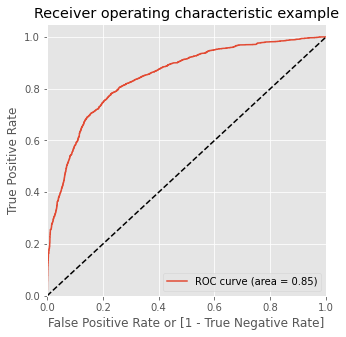

In [138]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)

### Optimum Threshold

In [139]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.34,1871,1,1,1,1,0,0,0,0,0,0
1,0,0.35,6795,1,1,1,1,0,0,0,0,0,0
2,0,0.34,3516,1,1,1,1,0,0,0,0,0,0
3,0,0.64,8105,1,1,1,1,1,1,1,0,0,0
4,0,0.33,3934,1,1,1,1,0,0,0,0,0,0


In [140]:
cutoff_df = pd.DataFrame(columns = ['cutoff','accuracy','sensitivity','specificity'])

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    confusion = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final[i])
    total = sum(sum(confusion))
    
    accuracy = (confusion[1,1] + confusion[0,0])/total
    sensitivity = confusion[1,1]/(confusion[1,1]+confusion[1,0])
    specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_df)

      cutoff  accuracy  sensitivity  specificity
0.00    0.00      0.38         1.00         0.00
0.10    0.10      0.50         0.98         0.21
0.20    0.20      0.67         0.91         0.53
0.30    0.30      0.76         0.82         0.72
0.40    0.40      0.79         0.69         0.85
0.50    0.50      0.78         0.61         0.89
0.60    0.60      0.77         0.54         0.92
0.70    0.70      0.75         0.43         0.94
0.80    0.80      0.72         0.32         0.97
0.90    0.90      0.68         0.17         0.99


<Figure size 864x864 with 0 Axes>

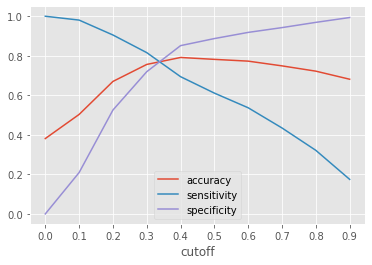

In [141]:
plt.figure(figsize = [12,12])
cutoff_df.plot.line(x = 'cutoff', y = ['accuracy','sensitivity','specificity'])
plt.xticks(numbers)
plt.show()

Probability Threshold is 0.34 (closer to 0.3) But considering 0.3 to tradeoff sensitivity against accuracy

In [142]:
y_train_pred_final.Predicted = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [143]:
confusion = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)
confusion

array([[2562, 1440],
       [ 359, 2107]], dtype=int64)

In [144]:
sensitivity = confusion[1,1]/(confusion[1,1] + confusion[1,0])
sensitivity*100

85.44201135442012

In [145]:
accuracy = metrics.accuracy_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)
accuracy*100

72.18614718614718

In [146]:
specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
specificity*100

64.01799100449776

Sensitivity for Training Dataset - 85.44%

### Precision and Recall

In [147]:
precision_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)

0.5940231181279955

In [148]:
recall_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)

0.8544201135442011

### Precision Recall Tradeoff

In [149]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)

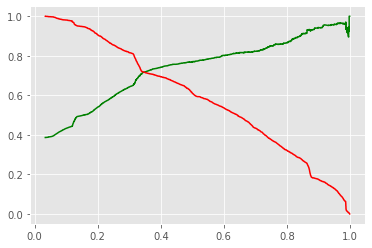

In [150]:
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

### Predicting on the test set

In [151]:
numerical_cols = ['total_visits','time_on_website','page_views_per_visit']

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [152]:
X_test = X_test[col]
X_test.head()

,lead_number,do_not_email,time_on_website,page_views_per_visit,lead_source_Olark Chat,lead_source_Other Social Sites,lead_source_Reference,occupation_Unemployed,occupation_Working Professional
4269,619003,0,0.44,0.89,0,0,0,0,0
2376,636884,0,0.00,0.00,0,0,1,1,0
7766,590281,0,0.03,0.56,0,0,0,0,1
9199,579892,0,0.00,0.00,1,0,0,1,0
4359,617929,0,0.00,0.00,0,0,1,1,0


In [155]:
X_test_sm = sm.add_constant(X_test)

In [157]:
y_test_pred = res.predict(X_test_sm.astype(float))

In [158]:
y_test_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [159]:
y_test_df['Cust_ID'] = y_test_df.index

In [160]:
y_test_df.reset_index(drop = True, inplace = True)
y_test_1.reset_index(drop = True, inplace = True)

In [161]:
y_pred_final = pd.concat([y_test_1,y_test_df], axis = 1)

In [162]:
y_pred_final = y_pred_final.rename(columns = {0:'Hot_Lead_Prob'})

In [163]:
y_pred_final = y_pred_final[['Cust_ID','converted','Hot_Lead_Prob']]

In [164]:
y_pred_final['Final_Predicted'] = y_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [165]:
y_pred_final = y_pred_final.sort_values(by = 'Hot_Lead_Prob', ascending = False)

In [166]:
y_pred_final

,Cust_ID,converted,Hot_Lead_Prob,Final_Predicted
546,3478,1,1.00,1
745,6383,1,1.00,1
1091,818,1,1.00,1
2405,5921,1,1.00,1
835,4613,1,1.00,1
...,...,...,...,...
139,322,0,0.02,0
943,5164,0,0.02,0
1488,4249,0,0.02,0
166,5521,0,0.02,0


In [167]:
y_pred_final['Score'] = y_pred_final.Hot_Lead_Prob.apply(lambda x: round(x*100,2))

In [168]:
y_pred_final

,Cust_ID,converted,Hot_Lead_Prob,Final_Predicted,Score
546,3478,1,1.00,1,99.94
745,6383,1,1.00,1,99.94
1091,818,1,1.00,1,99.92
2405,5921,1,1.00,1,99.90
835,4613,1,1.00,1,99.84
...,...,...,...,...,...
139,322,0,0.02,0,1.69
943,5164,0,0.02,0,1.56
1488,4249,0,0.02,0,1.53
166,5521,0,0.02,0,1.52


In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.Final_Predicted)
confusion2

array([[1062,  615],
       [ 148,  947]], dtype=int64)

In [170]:
accuracy_test = metrics.accuracy_score(y_pred_final.converted, y_pred_final.Final_Predicted)
accuracy_test*100

72.47474747474747

In [171]:
sensitivity_test = confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])
sensitivity_test*100

86.48401826484017

In [172]:
specificity_test = confusion2[0,0]/(confusion2[0,1]+confusion2[0,0])
specificity_test*100

63.327370304114496

Sensitivity for Testing Dataset - 86.48%

Difference between Sensitivity scores of Train and Test 1.04

Features to be considered:

    1. Lead with occupation/ student
    
    2. soure of the search is google
    
    3. leads from social media and through reference
    
    4. number of times page is visited